In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
iris_df=load_iris()

In [ ]:
iris_df.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(iris_df.data,iris_df.target,test_size=0.3,random_state=0)

In [ ]:
## Pipelines Creation
## 1. Data Preprocessing by using Standard Scaler
## 2. Reduce Dimension using PCA
## 3. Apply  Classifier

In [ ]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [ ]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])

In [ ]:
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])

In [ ]:
## LEts make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest]

In [ ]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [ ]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [ ]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.8666666666666667
Decision Tree Test Accuracy: 0.9111111111111111
RandomForest Test Accuracy: 0.9111111111111111


In [ ]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:Decision Tree


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

1.0

PERFORMING EDA FOR IRIS DATASET !!!


In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

df = pd.read_csv("/content/Iris.csv") 
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.groupby('Id').agg(['mean', 'median'])  # passing a list of recognized strings
df.groupby('Id').agg([np.mean, np.median])

<ipython-input-20-33b587ed11d7>:1: FutureWarning: ['Species'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('Id').agg(['mean', 'median'])  # passing a list of recognized strings
<ipython-input-20-33b587ed11d7>:2: FutureWarning: ['Species'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('Id').agg([np.mean, np.median])


SepalLengthCm        SepalWidthCm        PetalLengthCm         \
             mean median         mean median          mean median   
Id                                                                  
1             5.1    5.1          3.5    3.5           1.4    1.4   
2             4.9    4.9          3.0    3.0           1.4    1.4   
3             4.7    4.7          3.2    3.2           1.3    1.3   
4             4.6    4.6          3.1    3.1           1.5    1.5   
5             5.0    5.0          3.6    3.6           1.4    1.4   
..            ...    ...          ...    ...           ...    ...   
146           6.7    6.7          3.0    3.0           5.2    5.2   
147           6.3    6.3          2.5    2.5           5.0    5.0   
148           6.5    6.5          3.0    3.0           5.2    5.2   
149           6.2    6.2          3.4    3.4           5.4    5.4   
150           5.9    5.9          3.0    3.0           5.1    5.1   

    PetalWidthCm         
            mean median  
Id                       
1            0.2    0.2  
2            0.2    0.2  
3            0.2    0.2  
4            0.2    0.2  
5            0.2    0.2  
..           ...    ...  
146          2.3    2.3  
147          1.9    1.9  
148          2.0    2.0  
149          2.3    2.3  
150          1.8    1.8  

[150 rows x 8 columns]

<Axes: xlabel='PetalWidthCm', ylabel='SepalWidthCm'>

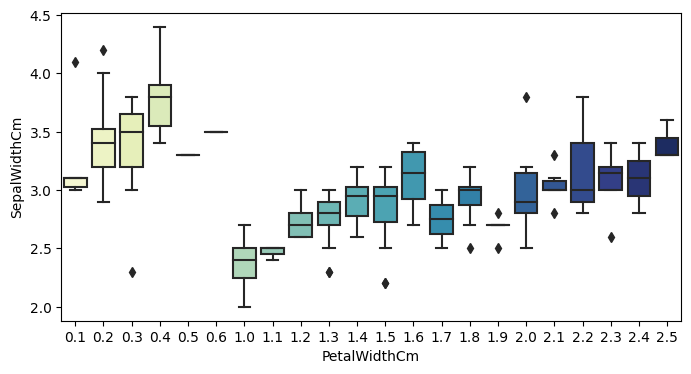

In [ ]:
plt.figure(figsize=(8,4)) 
sns.boxplot(x='PetalWidthCm',y='SepalWidthCm',data=df ,palette='YlGnBu')

<ipython-input-27-c488df996998>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df['PetalWidthCm'], bins=40, color='b')


Text(0.5, 1.0, 'petal width distribution plot')

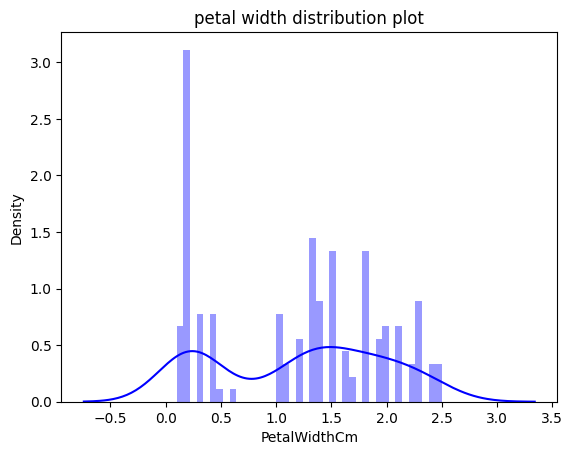

In [ ]:
sns.distplot(a=df['PetalWidthCm'], bins=40, color='b')
plt.title('petal width distribution plot')

<Axes: xlabel='SepalLengthCm', ylabel='count'>

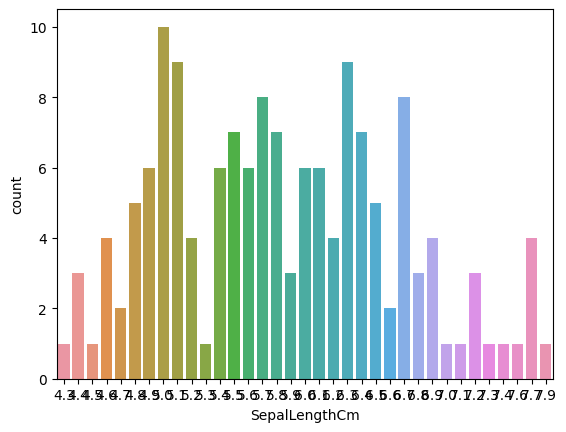

In [ ]:
sns.countplot(x='SepalLengthCm',data=df)

<ipython-input-29-664cac424cd1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), linecolor='white', linewidths=1)


<Axes: >

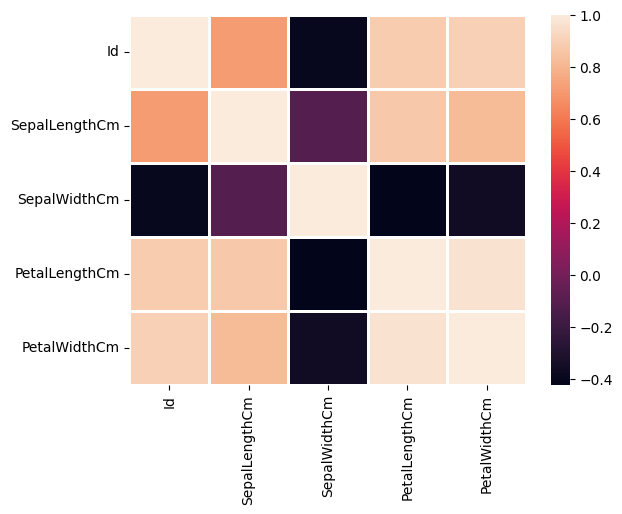

In [ ]:
sns.heatmap(df.corr(), linecolor='white', linewidths=1)


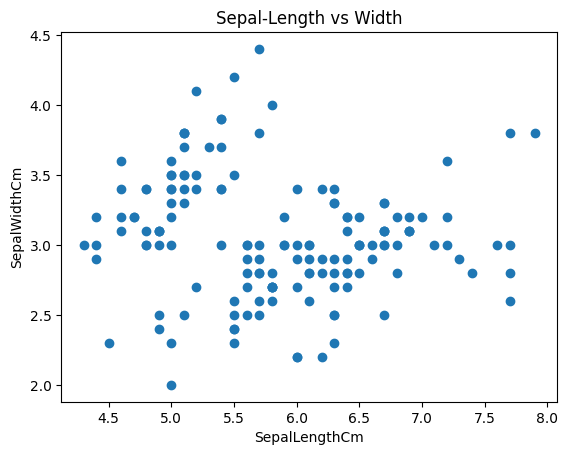

In [ ]:
axis = plt.axes()

axis.scatter(df.SepalLengthCm, df.SepalWidthCm)

axis.set(xlabel='SepalLengthCm',
   ylabel='SepalWidthCm',
   title='Sepal-Length vs Width');

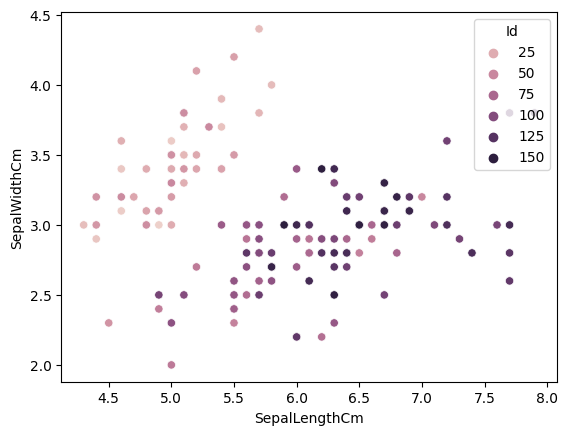

In [ ]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Id', data=df)
plt.show()

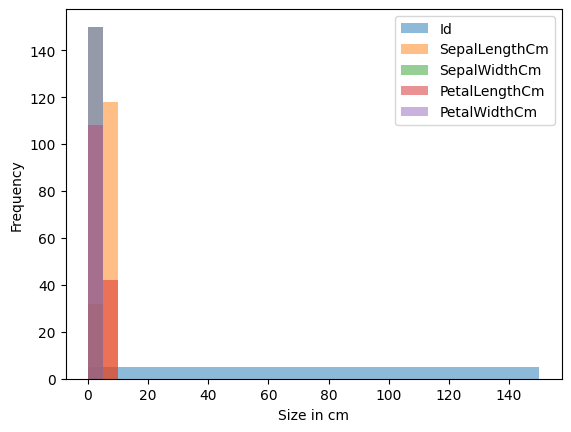

In [ ]:
axis = df.plot.hist(bins=30, alpha=0.5)
axis.set_xlabel('Size in cm');

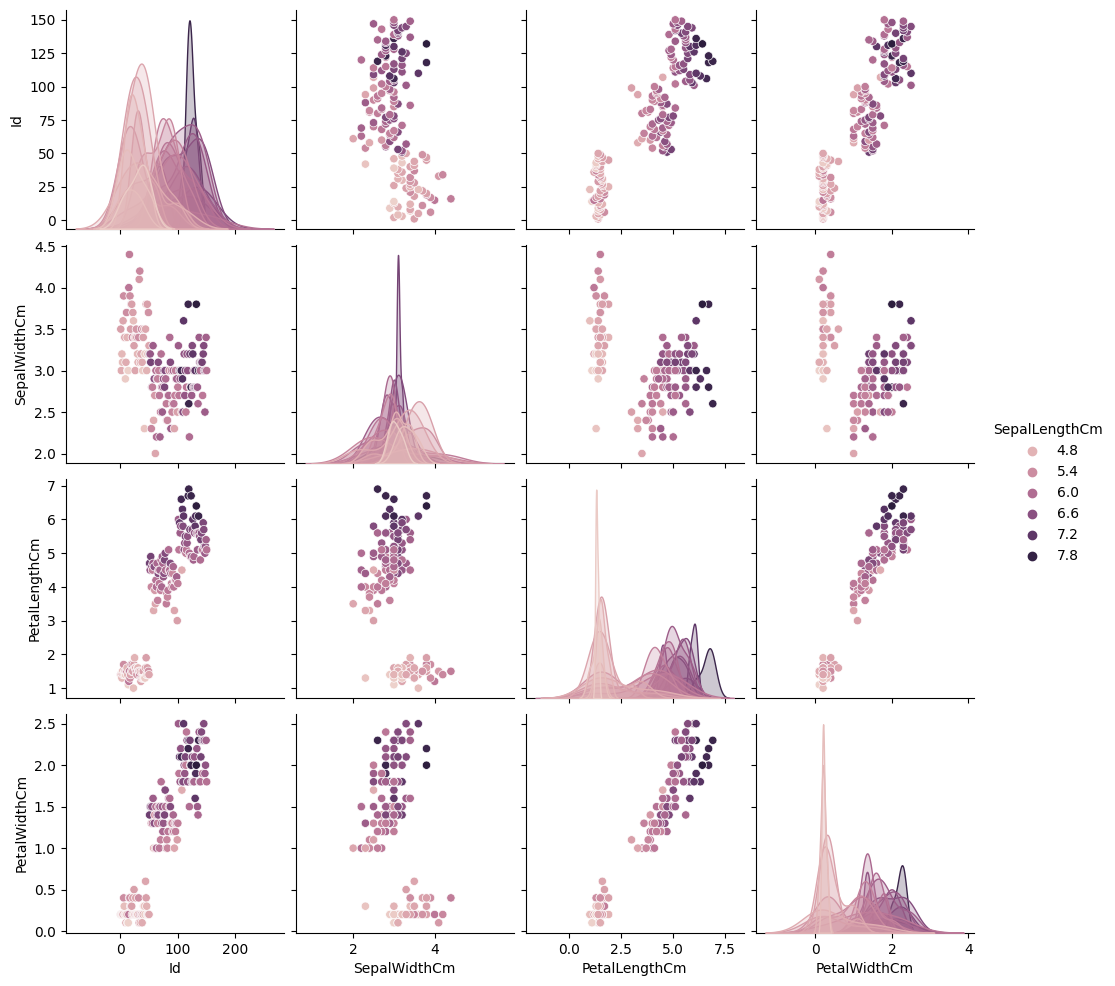

In [ ]:
sns.pairplot(df, hue='SepalLengthCm')

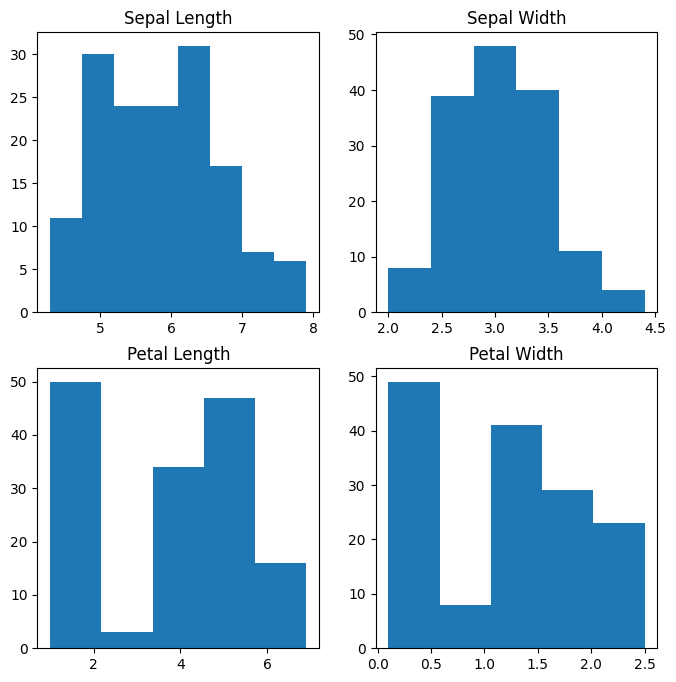

In [ ]:
figure, ax = plt.subplots(2, 2, figsize=(8,8))

ax[0,0].set_title("Sepal Length")
ax[0,0].hist(df['SepalLengthCm'], bins=8)

ax[0,1].set_title("Sepal Width")
ax[0,1].hist(df['SepalWidthCm'], bins=6);

ax[1,0].set_title("Petal Length")
ax[1,0].hist(df['PetalLengthCm'], bins=5);

ax[1,1].set_title("Petal Width")
ax[1,1].hist(df['PetalWidthCm'], bins=5);